# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [21]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

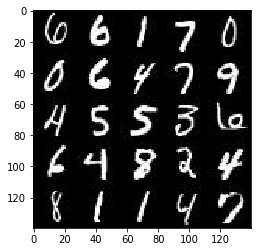

In [22]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

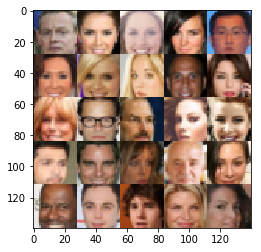

In [23]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [25]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32,[None,image_width,image_height,image_channels],name = 'input_images')
    input_z = tf.placeholder(tf.float32,[None,z_dim],name = 'input_z')
    learning_rate = tf.placeholder(tf.float32,None,name = 'learning_rate')
    return input_images, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [26]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator',reuse = reuse):
        init_weight = tf.contrib.layers.xavier_initializer(dtype=tf.float32,seed=None,uniform=True)# 随机初始化权重
        x = tf.layers.conv2d(images,64,5,strides=2,padding='same',kernel_initializer=init_weight)
        x = tf.maximum(alpha*x,x) 
        x = tf.layers.dropout(x,rate=0.5)
        print(x) # 14 14 64
        
        x1 = tf.layers.conv2d(x,128,5,strides=2,padding='same')
        x1 = tf.layers.batch_normalization(x1,training=True)
        x1 = tf.maximum(alpha * x1,x1)
        x1 = tf.layers.dropout(x1,rate=0.5)
        print(x1) #7 7 128
        
        x2 = tf.layers.conv2d(x1,256,4,strides=1,padding='valid')
        x2 = tf.layers.batch_normalization(x2,training = True)
        x2 = tf.maximum(alpha *x2,x2)
        x2 = tf.layers.dropout(x2,rate=0.5)
        print(x2) # 4 4 256
        
        #x3 = tf.layers.conv2d(x2,256,5,strides=2,padding='same')
       # x3 = tf.layers.batch_normalization(x3,training=reuse)        
        #x3 = tf.maximum(alpha *x3,x3)
        # 2 2 512
        #print(x3)
               
        x3 = tf.reshape(x2,(-1,4*4*256))
        logits = tf.layers.dense(x3,1)
        out = tf.sigmoid(logits)
    return logits, out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tensor("dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("dropout_4/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("dropout_5/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("dropout_6/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [27]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator',reuse=not is_train):
        
        x = tf.layers.dense(z,4*4*512)
        x = tf.reshape(x,(-1,4,4,512))
        x = tf.layers.batch_normalization(x,training = is_train)
        x = tf.maximum(alpha * x,x)
        #print(x.shape) 4 4 512
        x1 = tf.layers.conv2d_transpose(x,256,4,strides=1,padding='valid')
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha*x1,x1)
        #print(x1.shape) 7 7 256
        x2 = tf.layers.conv2d_transpose(x1,128,5,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha*x2,x2)
        #print(x2.shape)14 14 128
        #x3 = tf.layers.conv2d_transpose(x2,64,5,strides=2,padding='same')
       # x3 = tf.layers.batch_normalization(x3,training=is_train)
       # x3 = tf.maximum(alpha*x3,x3)
       # print(x3.shape)
        
        logits = tf.layers.conv2d_transpose(x2,out_channel_dim,5,strides=2,padding='same')
        out = tf.tanh(logits)
       # print(logits.shape) 28 28 out_channel_dim
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

###  您对我这个cell的建议，我没有太明白，可否再说一下，真的感谢。关于moving mean .....
###  增加了smooth的话，对dloss会有什么好处啊，而且这个值应该怎么选，我是参考了minist的数值大小 感谢

In [28]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_out = generator(input_z,out_channel_dim)
    d_logits_real, d_out_real = discriminator(input_real)
    d_logits_fake, d_out_fake = discriminator(g_out,reuse=True)
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_out_fake)))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_out_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_out_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tensor("discriminator/dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator/dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator/dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator_1/dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator_1/dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator_1/dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [29]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    d_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss,var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss,var_list = g_vars)

    return d_train_opt,g_train_opt 



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [30]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

# 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [31]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real,input_z ,learn_rate = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss,g_loss = model_loss(input_real,input_z,data_shape[3])
    d_train_op,g_train_op = model_opt(d_loss,g_loss,learning_rate,beta1)
    
    print(mnist_dataset.shape)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            count = 0
            for batch_images in get_batches(batch_size):
                count += 1
                # TODO: Train Model
                #因为generator输出的值在【-1,1】，但是数据处理之后，真实图像的值在【-0.5,0.5】之间，为了保持一致，做一下处理
                batch_images = batch_images * 2
                # 用于生成图像的噪点
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #开始启动优化器
                _ = sess.run(d_train_op,feed_dict={input_real:batch_images,input_z:batch_z,learn_rate:learning_rate})
                _ = sess.run(g_train_op,feed_dict={input_z:batch_z,input_real:batch_images,learn_rate:learning_rate})
                
                train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images,learn_rate:learning_rate})
                train_loss_g = g_loss.eval({input_z:batch_z,input_real:batch_images,learn_rate:learning_rate})
                
                
                if(count % 200 == 0):# 每200张打印一次loss
                    print(count,'d_loss',train_loss_d,'   -------  g_loss',train_loss_g) 
                
            print("Epoch {}/{}...".format(epoch_i+1, epochs),
                    "Discriminator Loss: {:.4f}...".format(train_loss_d),
                    "Generator Loss: {:.4f}".format(train_loss_g))  
            
            show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                
                
                

In [32]:
print(0 % 100)

0


### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

### 您好，您建议beta1的值调小一点，这个值在优化的时候对什么有影响呢，感谢。

Tensor("discriminator/dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator/dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator/dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator_1/dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator_1/dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator_1/dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
(60000, 28, 28, 1)
200 d_loss 1.0679    -------  g_loss 1.69807
400 d_loss 1.08183    -------  g_loss 0.834618
600 d_loss 1.26413    -------  g_loss 0.576554
800 d_loss 0.951598    -------  g_loss 1.00973
1000 d_loss 1.10307    -------  g_loss 0.707176
1200 d_loss 0.803665    -------  g_loss 1.1606
1400 d_loss 1.18556    -------  g_loss 0.680887
1600 d_loss 1.16449    -------  g_loss 0.707937
1800 d_loss 0.693924    -------  g_loss 1.40177
Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0

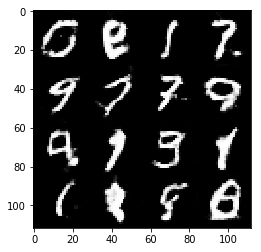

In [33]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3
'''
1.batch_size = 128 learning_rate = 0.1 epochs = 10 , 结果不能看， d_loss 大概等于0，g_loss在10附近徘徊
2.bat_size = 256，learning_rate = 0.01 epochs = 5，结果不能看，Discriminator Loss: 0.0125... Generator Loss: 5.1590
3.bat_size = 256,learning_rate = 0.001 epochs = 5,有点点能看，Epoch 5/5... Discriminator Loss: 1.3782... Generator Loss: 0.7008,
4.bat_size = 256,learning_rate = 0.001 epochs = 10，Epoch 10/10... Discriminator Loss: 1.3943... Generator Loss: 0.7076
5.bat_size = 256,learning_rate = 0.0001 epochs = 5,Epoch 5/5... Discriminator Loss: 1.3956... Generator Loss: 0.6859
6.将5中的alpha改为了0.2  生成的图像比之前的都好。Epoch 5/5... Discriminator Loss: 1.3617... Generator Loss: 0.7031 
7.将6中的batche_size改成了128，Epoch 5/5... Discriminator Loss: 1.3090... Generator Loss: 0.7396  loss没有降低，但是图像的效果好了一些
'''

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Tensor("discriminator/dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator/dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator/dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("discriminator_1/dropout/Identity:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("discriminator_1/dropout_2/Identity:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("discriminator_1/dropout_3/Identity:0", shape=(?, 4, 4, 256), dtype=float32)
(60000, 28, 28, 1)
200 d_loss 1.26033    -------  g_loss 0.737361
400 d_loss 1.47912    -------  g_loss 0.467037
600 d_loss 1.34056    -------  g_loss 0.801328
800 d_loss 1.32246    -------  g_loss 1.22369
1000 d_loss 1.60399    -------  g_loss 0.43809
1200 d_loss 1.38287    -------  g_loss 0.673269
1400 d_loss 1.35303    -------  g_loss 0.594295
1600 d_loss 1.23238    -------  g_loss 0.836538
1800 d_loss 1.36529    -------  g_loss 0.50975
2000 d_loss 1.26691    -------  g_loss 0.80746
2200 d_loss 1

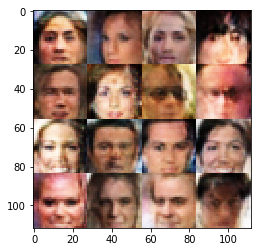

200 d_loss 0.988011    -------  g_loss 1.21824
400 d_loss 1.09733    -------  g_loss 0.855778
600 d_loss 1.12027    -------  g_loss 0.827146
800 d_loss 1.04996    -------  g_loss 1.33986
1000 d_loss 0.865526    -------  g_loss 1.20823
1200 d_loss 1.32514    -------  g_loss 1.50736
1400 d_loss 1.05127    -------  g_loss 1.15879
1600 d_loss 0.873141    -------  g_loss 1.36176
1800 d_loss 1.07249    -------  g_loss 0.880247
2000 d_loss 1.0386    -------  g_loss 0.810306
2200 d_loss 1.47686    -------  g_loss 0.461141
2400 d_loss 0.815648    -------  g_loss 1.25106
2600 d_loss 0.511168    -------  g_loss 2.52187
2800 d_loss 0.748469    -------  g_loss 1.48658
3000 d_loss 1.14478    -------  g_loss 1.01237
3200 d_loss 1.11902    -------  g_loss 1.47691
3400 d_loss 0.937662    -------  g_loss 1.60012
3600 d_loss 0.951712    -------  g_loss 0.904061
3800 d_loss 0.756451    -------  g_loss 1.56284
4000 d_loss 0.834093    -------  g_loss 1.91589
4200 d_loss 1.45099    -------  g_loss 0.461939
4

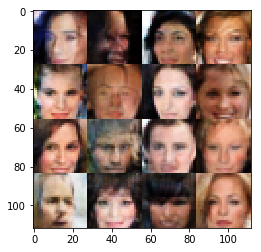

In [34]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。

####  1. 在generator（）中反卷积的时候，卷积核为什么大部分都是5， 然后卷积核大小和strides大小有什么可以更好确定的方法吗？

#### 2. 整个loss 跳动的很大，而且在mnist中，没有满足gloss < dloss， 但是也可以生成图像，因为跑的过程中，总会出现（workspace）加载失败，因为没有保存模型，所以每次得重新训练，最后就都跑了一个epoch

#### 3. 最终的loss理想情况的大概范围是怎么样的？还有dloss是不是才是我们更应该关注的。

#### 4. 然后就是一些建议了。感谢。